# Hugging Face Transformers

Hugging Face is an organization that is on a path to solve and democratize AI through natural language. Their open-source library 'transformers' is very popular among the NLP community. It is very useful and powerful for several NLP and NLU tasks. It includes thousands of pre-trained models in about 100+ languages. One of the many advantages of the transformer library is that it is compatible with both PyTorch and TensorFlow.

In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 69.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 13.6 MB/s eta 0:00:00


# Generating BERT embedding

In this section, we will learn how to extract embeddings from the pre-trained BERT. 

Consider the sentence 'I love Paris'. Let's see how to obtain the contextualized word embedding of all the words in the sentence using the pre-trained BERT model with Hugging Face's transformer library.

First, let's import the necessary modules:

In [2]:
from transformers import BertModel, BertTokenizer
import torch

Next, we download the pre-trained BERT model. We can check all the available pre-trained BERT models here: 
- https://huggingface.co/transformers/pre-trained_models.html.

We use the 'bert-base-uncased' model. As the name suggests, it is the BERT-base model with 12 encoders and it is trained with uncased tokens. Since we are using the BERT-base, the representation size will be 768.

Download and load the pre-trained bert-base-uncased model:

In [3]:
model = BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Next, we download and load the tokenizer which is used for pretraining the bert-base-uncased model:

In [4]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Now, let's see how to preprocess the input before feeding it to the BERT.

#Preprocessing the input

Define the sentence:

In [5]:
sentence = 'I love Paris'

Tokenize the sentence and obtain the tokens:

In [6]:
tokens = tokenizer.tokenize(sentence)

Let's print the tokens:

In [7]:
print(tokens)

['i', 'love', 'paris']


Now, we will add the `[CLS]` token at the beginning and `[SEP]` token at the end of the tokens list:

In [8]:
tokens = ['[CLS]'] + tokens + ['[SEP]']

In [9]:
print(tokens)

['[CLS]', 'i', 'love', 'paris', '[SEP]']


As we can observe, we have [CLS] token at the beginning and sep token at the end of our tokens list. We can also observe that length of our tokens is 5.

Say, we need to keep the length of our tokens list to 7, then, in that case, we will add two [PAD] tokens at the end as shown in the following:

In [10]:
tokens = tokens + ['[PAD]'] + ['[PAD]'] 

In [11]:
print(tokens)

['[CLS]', 'i', 'love', 'paris', '[SEP]', '[PAD]', '[PAD]']


Next, we create the attention mask. We set the attention mask value to 1 if the token is not a [PAD] token else we will set the attention mask to 0 as shown below:

In [12]:
attention_mask = [1 if i!= '[PAD]' else 0 for i in tokens]

In [13]:
print(attention_mask)

[1, 1, 1, 1, 1, 0, 0]


As we can observe, we have attention mask values 0 at the position where have [PAD] token and 1 at other positions.

Next, we convert all the tokens to their token_ids as shown below:

In [14]:
token_ids = tokenizer.convert_tokens_to_ids(tokens)

In [15]:
print(token_ids)

[101, 1045, 2293, 3000, 102, 0, 0]


From the above output, we can observe that each token is mapped to a unique token id.

**Now, we convert the token_ids and attention_mask to tensors as shown below:**

In [16]:
print(token_ids)

[101, 1045, 2293, 3000, 102, 0, 0]


In [17]:
print(attention_mask)

[1, 1, 1, 1, 1, 0, 0]


In [18]:
token_ids = torch.tensor(token_ids).unsqueeze(0)
attention_mask = torch.tensor(attention_mask).unsqueeze(0)

That's it. Next, we feed the token_ids and attention_mask to the pre-trained BERT model and get the embedding.

# Getting the embedding

As shown in the following code, we feed the `token_ids` and `attention_mask` to the model and get the embeddings.

Note that the model returns the output as a tuple with two values. 
- The first value indicates the hidden state representation, hidden_rep and it consists of the representation of all the tokens obtained from the final encoder (encoder 12), and
- The second value, cls_head consists of the representation of the `[CLS]` token

In [30]:
hidden_rep, cls_head = model(token_ids, attention_mask = attention_mask)

In the preceding code, hidden_rep contains the embedding(representation) of all the tokens in our input. Let's print the shape of hidden_rep tensor:

In [31]:
hidden_rep

'last_hidden_state'

In [32]:
print(hidden_rep)

last_hidden_state


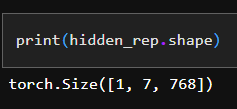

The size [1,7,768] indicates the[batch_size, sequence_length, hidden_size].

Our batch size is 1, the sequence length is the token length, since we have 7 tokens, the sequence length is 7, and the hidden size is the representation (embedding) size and it is 768 for the BERT-base model.

We can obtain the representation of each token as:

- hidden_rep[0][0] gives the representation of the first token which is [CLS]
- hidden_rep[0][1] gives the representation of the second token which is 'I'
- hidden_rep[0][2] gives the representation of the third token which is 'love'

In this way, we can obtain the contextual representation of all the tokens. This is basically the contextualized word embeddings of all the words in the given sentence.

Now, let's take a look at the cls_head. It contains the representation of the `[CLS]` token. Let's print the shape of cls_head :

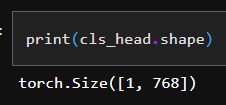

The above code will print:

- torch.Size([1, 768])

- The size [1,768] indicates the[batch_size, hidden_size].

**We learned that `cls_head` holds the aggregate representation of the sentence, so we can use the `cls_head` as the representation of the given sentence 'I love Paris'.**

We learned how to extract embeddings from the pre-trained BERT. But these are the embeddings obtained only from the topmost encoder layer of BERT which is encoder 12. Can we also extract the embeddings from all the encoder layers of BERT? Yes! We will find out how to do that in the next section.

Sources: https://github.com/PacktPublishing/Getting-Started-with-Google-BERT